In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv(r'C:\Users\vamsi\Documents\Learnbay\Datasets\advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [31]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

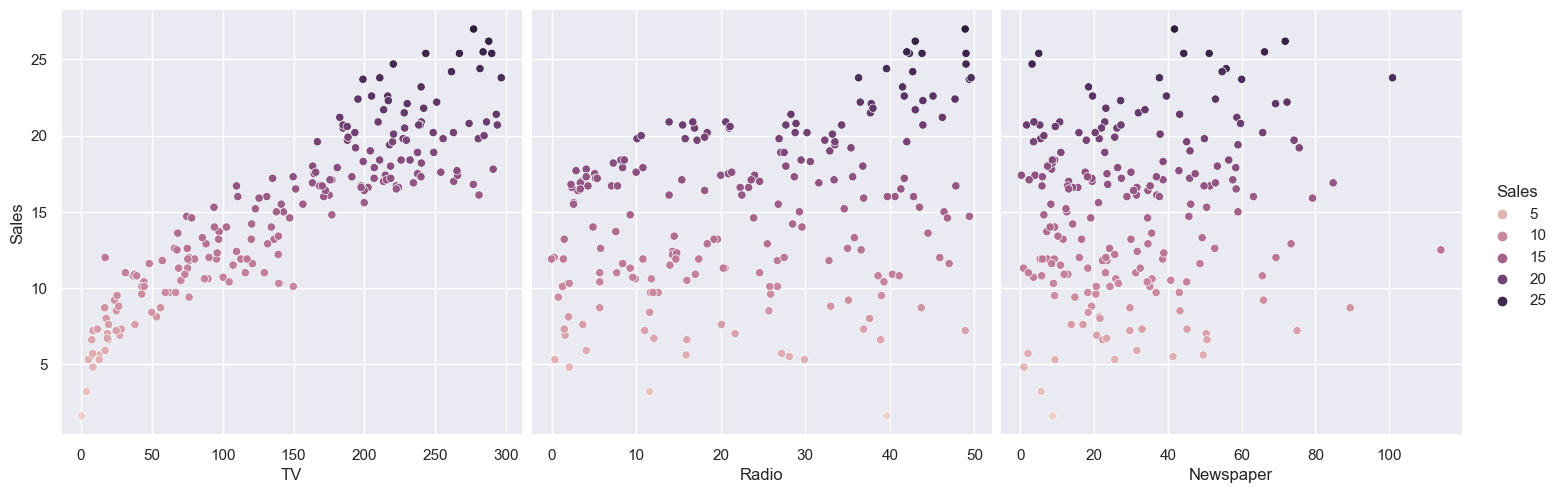

In [18]:
sns.pairplot(data=df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', hue='Sales', size=5)

plt.show()

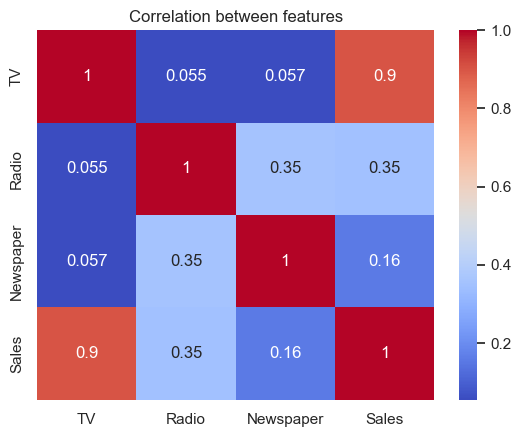

In [25]:
plt.figure(dpi=100)

sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation between features')
plt.show()

### From the above map TV sales are more compared to others.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(df['TV'], df['Sales'], test_size=0.5, random_state=13)
lin = LinearRegression()

In [54]:
y_test

179    17.6
155     3.2
23     20.5
159    12.9
96     16.7
       ... 
188    20.9
63     14.0
152    16.6
39     21.5
28     18.9
Name: Sales, Length: 100, dtype: float64

In [57]:
x_train_1 = x_train.values.reshape(-1, 1)
x_test_1 = x_test.values.reshape(-1, 1)
lin.fit(x_train_1, y_train)


LinearRegression()

In [58]:
lin.predict(x_test_1)

array([16.301549  ,  7.37723894, 19.76628114, 14.42827277, 18.06983334,
       22.82209752, 23.37468638, 19.62813392, 19.32421005, 17.36804549,
       16.17445356,  8.53214966, 10.96354063, 21.82743758, 22.63421731,
       13.21810317,  7.61485215, 13.56070826, 20.31334411, 18.15272167,
       16.45627388, 10.44410711, 23.33600516, 13.79279558, 19.05344151,
       19.8325918 , 15.4284586 , 20.10888623, 23.52941126,  7.4490755 ,
       13.26783617, 17.85432369, 14.77087786, 10.80328986, 14.39511744,
       12.53841888, 14.57194587, 17.9482638 ,  9.26156695, 13.08548185,
       11.96925235, 20.269137  , 19.13080395,  7.87456892, 21.80533402,
       20.50675021, 19.18053695, 12.46658233,  8.46583899, 21.01513196,
       22.27503455, 12.69866965, 10.97459241, 19.44025371, 12.52184121,
       15.29031139, 22.70052797,  8.23375167,  8.10113035, 11.32272339,
        9.53233549,  8.53767555,  9.25051517, 18.4787491 , 12.10739957,
       14.90349919, 11.30061984, 11.27851628,  9.9136218 , 22.44

In [63]:
print(lin.intercept_)
print(lin.coef_)

7.150677512446474
[0.05525889]


In [67]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

lr1 = sm.OLS(y_train, x_train_sm).fit()

lr1.params

const    7.150678
TV       0.055259
dtype: float64